<a href="https://colab.research.google.com/github/SSimhadri-16/Data-Visualization/blob/main/Visualization_of_VideoGamesSales(Team_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                **Analysing and Visualizing Video Games Sales**

# **Importing the Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the datset**

In [ ]:
data = pd.read_csv("video_games_sales.csv")
data.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **Data Preprocessing**

In [ ]:
data.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [ ]:
data.shape

(16598, 11)

In [ ]:
data.dropna(subset=['year','publisher'], axis=0,inplace=True)

In [ ]:
data.dtypes
print(data.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool>


In [ ]:
data= data.astype({'platform':'str','year':'int64','na_sales': 'int64','eu_sales':'int64','jp_sales':'int64','other_sales':'int64','global_sales':'int64'})

In [ ]:
data.dtypes

rank             int64
name            object
platform        object
year             int64
genre           object
publisher       object
na_sales         int64
eu_sales         int64
jp_sales         int64
other_sales      int64
global_sales     int64
dtype: object

In [ ]:
data.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41,29,3,8,82
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29,3,6,0,40
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15,12,3,3,35
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15,11,3,2,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11,8,10,1,31


# **Visualizing Area Plot using Matplotlib**

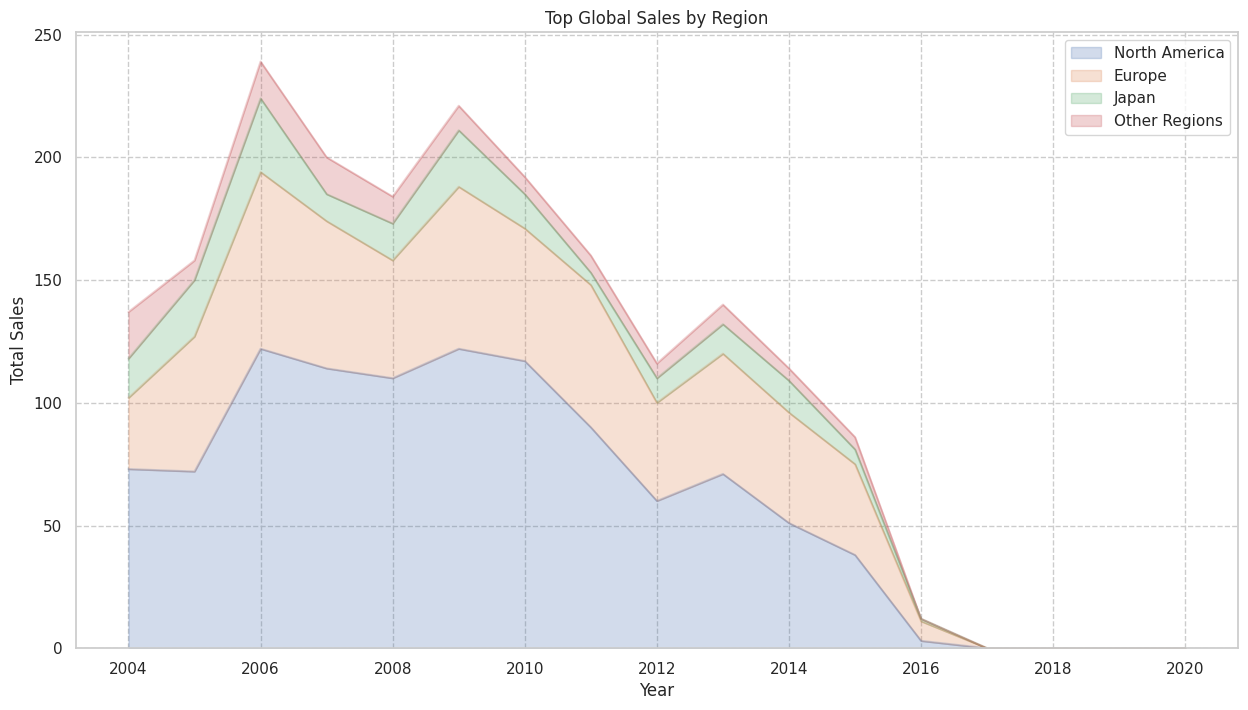

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

#Generate area plot
data['North America'] = data['na_sales']
data['Europe'] = data['eu_sales']
data['Japan'] = data['jp_sales']
data['Other Regions'] = data['other_sales']

# Group the data by year and sum the sales data for each region
grouped_df=data.groupby(['year'])['North America','Europe','Japan','Other Regions'].sum().reset_index()

#Sorting in Descending order
sorted_grouped_df = grouped_df.sort_values('year', ascending=False).head(15).reset_index()
sorted_grouped_df.drop('index',axis=1,inplace=True)

#Plotting the chart
sorted_grouped_df.plot(kind='area',x='year', alpha=0.25, figsize=(15,8))

#Add a title
plt.title('Top Global Sales by Region')

#Add labels for axis
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.grid(True, linestyle='--')

#Show the plot
plt.show()


# **Visualizing Area Plot using Seaborn**

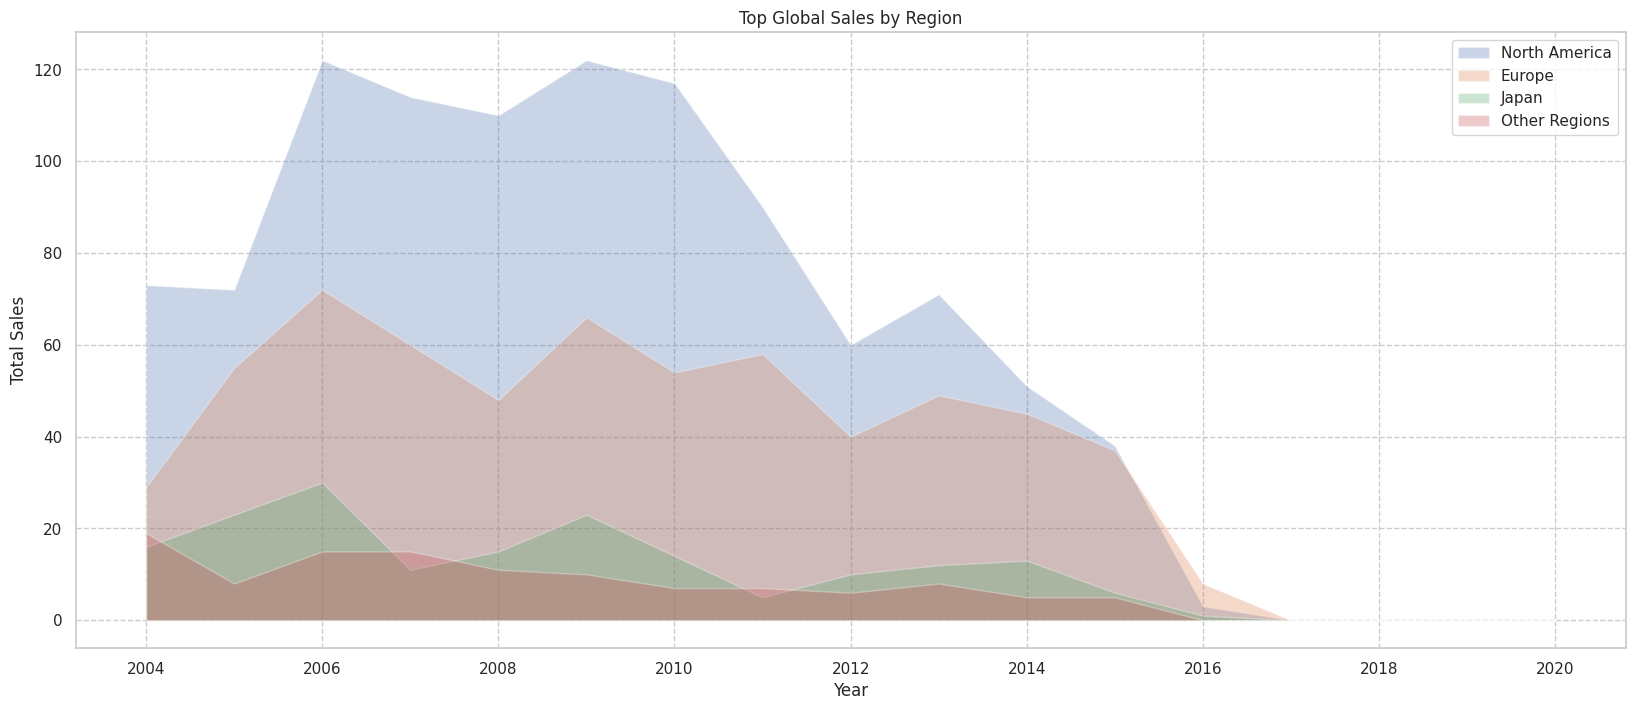

In [ ]:
#Generate the seaborn plot
fig, ax = plt.subplots(figsize=(20,8))
for col in ['North America', 'Europe', 'Japan', 'Other Regions']:
    ax.fill_between(sorted_grouped_df['year'], sorted_grouped_df[col], alpha=0.3, label=col)

#Add title,labels
plt.title('Top Global Sales by Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()

plt.grid(True, linestyle='--', linewidth=1)

#Show the plot
plt.show()


# **Visualizing Area Plot Using Plotly**

In [ ]:
#Generate the area plot
fig = px.area(sorted_grouped_df, x='year', y=['North America', 'Europe', 'Japan', 'Other Regions'])
fig.update_layout(title='Top Global Sales by Region', xaxis_title='Year', yaxis_title='Total Sales')
fig.show()

**Conclusion**
While both Matplotlib and Plotly provided good visualizations, Plotly's highly interactive and dynamic nature made it a better choice for exploring the data in more detail and sharing it with others online. However, Matplotlib's simplicity and ease of customization make it a good choice for creating static visualizations for publication or presentation purposes. Ultimately, the choice of library will depend on the specific needs and goals of the project.
  Moreover, coming to the dataset North America has huge amount of sales between 2006 and 2010 and Other Region sales are low throughout the years. There is a drastic change of sales in North America after 2010. Additionally, there are barely any sales after 2017 globally.



# **Waffle Charts**

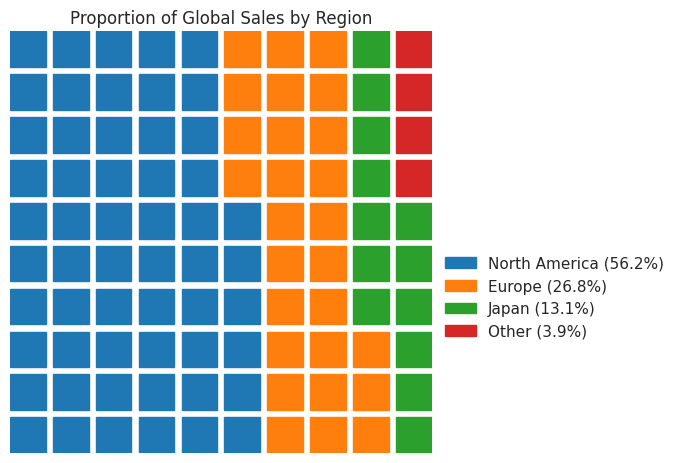

In [ ]:
#importing the library
from pywaffle import Waffle

# calculate the total global sales for each region
sales_by_region = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
sales_by_region_percent = (sales_by_region / sales_by_region.sum()) * 100

# generate a waffle chart for the proportion of global sales for each region
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=sales_by_region_percent,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    legend={'labels': [f"North America ({sales_by_region_percent['na_sales']:.1f}%)", 
                       f"Europe ({sales_by_region_percent['eu_sales']:.1f}%)", 
                       f"Japan ({sales_by_region_percent['jp_sales']:.1f}%)", 
                       f"Other ({sales_by_region_percent['other_sales']:.1f}%)"], 'loc': 'upper left', 'bbox_to_anchor': (1, 0.5), 'framealpha': 0}
)

# add a title
plt.title('Proportion of Global Sales by Region')

# show the plot
plt.show()

# **Word Clouds**

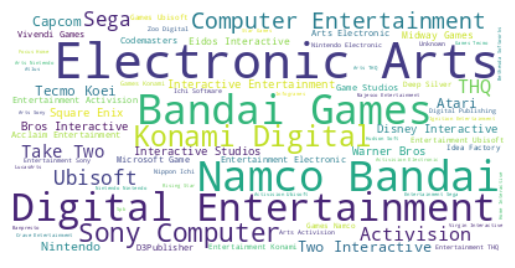

In [ ]:
#importing the library
from wordcloud import WordCloud

#Concatenate all genres into a single string
#text = ' '.join(data['genre'])

#Concatenate all publishers into a single string
text = ' '.join(data['publisher'])

# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

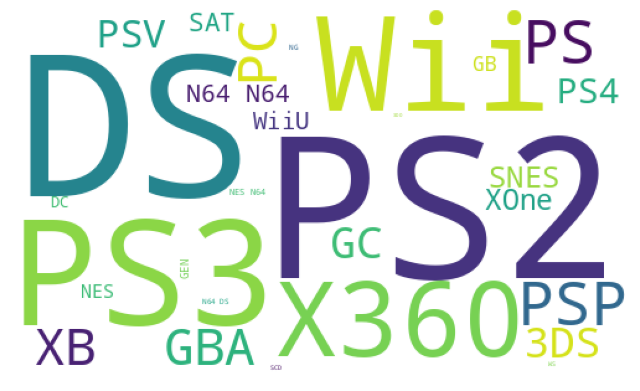

In [ ]:
#Concatenate all platforms into a single string
text = ' '.join(data['platform'])

# Generate the word cloud
wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Seaborn Plot**

Text(0, 0.5, 'Global Sales (in millions)')

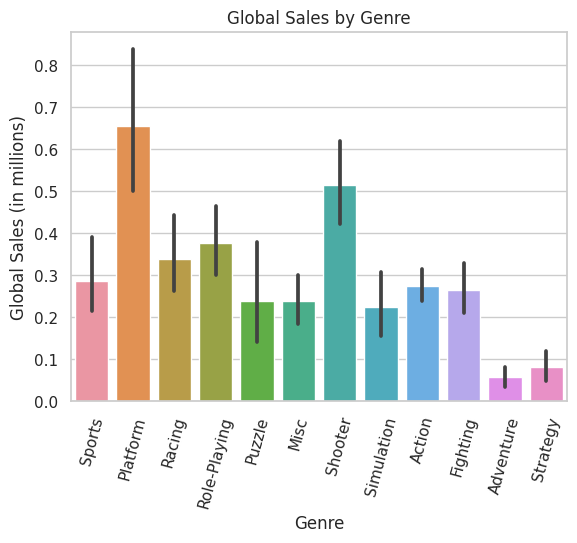

In [ ]:
#Generate seaborn plot
sns.set(style="whitegrid")
ax = sns.barplot(x="genre", y="global_sales", data=data)
ax.set_title("Global Sales by Genre")
plt.xticks(rotation=75)
ax.set_xlabel("Genre")
ax.set_ylabel("Global Sales (in millions)")

Conclusion-From the above generated charts we can say that
1. North America has the highest proportion of global sales for video games, followed by Europe and Asia. This information can be useful for companies looking to target their marketing and advertising efforts for video games in these regions.
2. The most common platforms for video games are PlayStation 2, Xbox 360, PlayStation 3, Wii, and DS. This information can be useful for companies looking to develop games for popular platforms.
3. The most popular genres for video games are platform, role-playing, and shooter. This information can be useful for companies looking to develop games for popular genres.
  Overall, these graphs provide insight into the trends and patterns in the video game industry and can be useful for decision-making in the gaming industry